In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

# Phân tích EDA cho đơn hàng

# 0. Load dữ liệu

In [4]:
# Header: order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
np.genfromtxt('instacart-data/orders.csv', skip_header=1, delimiter=',')

array([[2539329.,       1.,      nan, ...,       2.,       8.,      nan],
       [2398795.,       1.,      nan, ...,       3.,       7.,      15.],
       [ 473747.,       1.,      nan, ...,       3.,      12.,      21.],
       ...,
       [ 626363.,  206209.,      nan, ...,       1.,      12.,      18.],
       [2977660.,  206209.,      nan, ...,       1.,      12.,       7.],
       [ 272231.,  206209.,      nan, ...,       6.,      14.,      30.]])

In [5]:
# Header: order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
csv_data = np.genfromtxt('instacart-data/orders.csv', skip_header=1, delimiter=',', usecols=[0,1,3,4,5,6])
print("Đã load xong!")

Đã load xong!


In [6]:
print(csv_data.shape)
print(csv_data.T[-1])

(3421083, 6)
[nan 15. 21. ... 18.  7. 30.]


# 1. Phân tích mô tả
(đơn biến, không dùng đồ thị)

**Phân tích theo giờ mua hàng**

In [7]:
order_hour_of_day = csv_data[:,4].astype(np.uint8)
print(order_hour_of_day.shape)
print(np.unique(order_hour_of_day))

(3421083,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [8]:
# Trung bình số đơn theo giờ
values, counts = np.unique(order_hour_of_day, return_counts=True)
print(values)
print(counts)
print("Trung bình số đơn mỗi giờ:", np.mean(counts))
print("Trung bình số đơn mỗi giờ:", order_hour_of_day.size/24)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 22758  12398   7539   5474   5527   9569  30529  91868 178201 257812
 288418 284728 272841 277999 283042 283639 272553 228795 182912 140569
 104292  78109  61468  40043]
Trung bình số đơn mỗi giờ: 142545.125
Trung bình số đơn mỗi giờ: 142545.125


In [9]:
print(np.median(counts)) # Median của số đơn hàng trong ngày
print(np.max(counts))    # Mode của số đơn hàng trong ngày

122430.5
288418


In [22]:
stats.mode(order_hour_of_day)

ModeResult(mode=array([10], dtype=uint8), count=array([288418]))

**Phân tích theo ngày mua hàng trong tuần**

In [12]:
order_dow = csv_data[:,3].astype(np.uint8)
print(order_dow.shape)
print(np.unique(order_dow))

(3421083,)
[0 1 2 3 4 5 6]


In [13]:
# Trung bình số đơn theo ngày trong tuần
values, counts = np.unique(order_dow, return_counts=True)
print(values)
print(counts)
print("Trung bình số đơn mỗi ngày trong tuần:", np.mean(counts))
print("Trung bình số đơn mỗi ngày trong tuần:", order_dow.size/7)

[0 1 2 3 4 5 6]
[600905 587478 467260 436972 426339 453368 448761]
Trung bình số đơn mỗi ngày trong tuần: 488726.14285714284
Trung bình số đơn mỗi ngày trong tuần: 488726.14285714284


In [14]:
print(np.median(counts)) # Median của số đơn hàng theo ngày trong tuần
print(np.max(counts))    # Mode của số đơn hàng theo ngày trong tuần

453368.0
600905


In [23]:
stats.mode(order_dow)

ModeResult(mode=array([0], dtype=uint8), count=array([600905]))

# 2. Phân tích theo các câu hỏi

## 2.1) Thời điểm nào trong ngày thường có nhiều đơn hàng nhất?
Vẽ biểu đồ phân bố đơn hàng theo giờ trong ngày{.unnumbered}

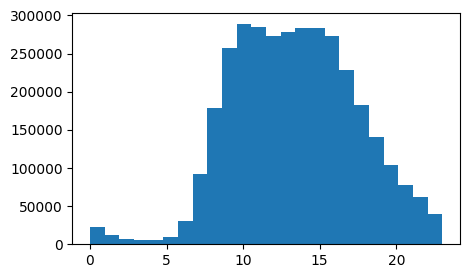

In [16]:
# Cách đơn giản nhất: vẽ histogram của cột order_hour_of_day
fig,ax = plt.subplots(figsize=(5,3), num=1)
ax.hist(order_hour_of_day, bins=24)
plt.show()

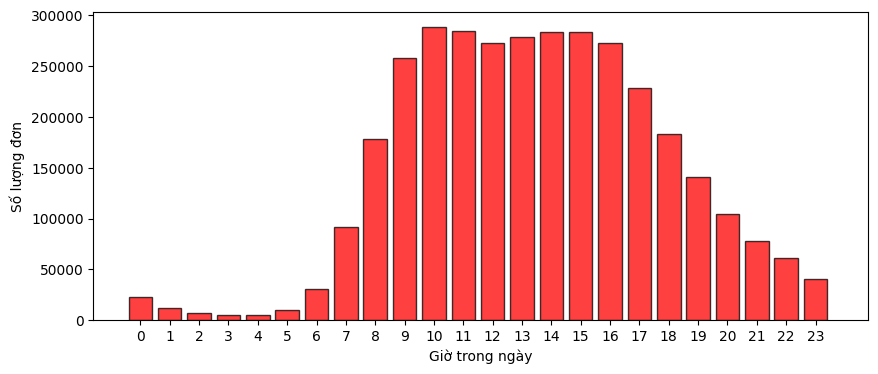

In [17]:
# Chỉnh sửa lại cho đẹp hơn
fig,ax = plt.subplots(figsize=(10,4), num=1)
ax.hist(order_hour_of_day, bins=np.arange(25), alpha=0.75, width=0.8,
                          color='red', edgecolor='black', linewidth=1.0)

xtick_labels = np.arange(24)
ax.set_xticks(xtick_labels+0.4)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel("Giờ trong ngày")
ax.set_ylabel("Số lượng đơn")
plt.show()

## 2.2) Thời điểm nào trong tuần thường có nhiều đơn hàng nhất? {.unnumbered}
Vẽ biểu đồ phân bố đơn hàng theo ngày trong tuần

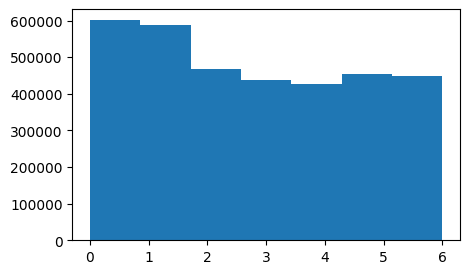

In [18]:
fig,ax = plt.subplots(figsize=(5,3), num=1)
ax.hist(order_dow, bins=7)
plt.show()

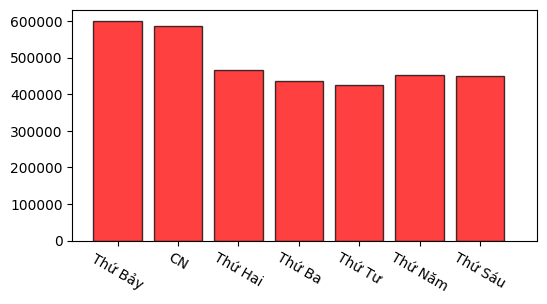

In [19]:
week_days = ['Thứ Bảy', 'CN', 'Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu']
fig,ax = plt.subplots(figsize=(6,3), num=1)
ax.hist(order_dow, bins=np.arange(8), alpha=0.75, width=0.8,
                          color='red', edgecolor='black', linewidth=1.0)
ax.set_xticks(np.arange(7) + 0.4)
ax.set_xticklabels(week_days, rotation=-30)
plt.show()

## 2.3. Mỗi khách hàng thường có số đơn hàng là bao nhiêu?
Vẽ biểu đồ phân bố số lượng khách hàng theo số đơn hàng mỗi khách đã mua

In [20]:
customer_id_order = csv_data.T[1].astype(int)
print(customer_id_order.size)
values, order_per_cus_counts = np.unique(customer_id_order, return_counts=True)
print(values.size)
print("Số lượng đơn mà từng khách hàng đã mua:", order_per_cus_counts[0:10])

3421083
206209
Số lượng đơn mà từng khách hàng đã mua: [11 15 13  6  5  4 21  4  4  6]


In [21]:
print(np.min(order_per_cus_counts), np.max(order_per_cus_counts))
print(np.mean(order_per_cus_counts))
print(np.median(order_per_cus_counts))
print(stats.mode(order_per_cus_counts))

4 100
16.590367054784224
10.0
ModeResult(mode=array([4]), count=array([23986]))


In [26]:
#labels = np.hstack([[4],np.arange(10,105,5)])
labels = [4] + list(np.arange(10,105,5))
print(labels)

[4, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


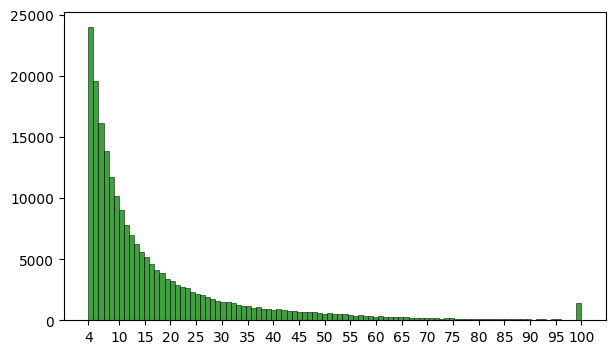

In [27]:
fig,ax = plt.subplots(figsize=(7,4), num=1)
n, bins, edges = ax.hist(order_per_cus_counts, bins=97,
                         color='green', alpha=.75, edgecolor='black', linewidth=0.5)
ax.set_xticks(labels)
plt.show()

## 2.4. Thường sau bao nhiêu ngày khách hàng lại re-order?
Vẽ biểu đồ số đơn hàng theo quãng thời gian re-order

In [28]:
reorder_days = csv_data.T[-1]
reorder_days = reorder_days[~np.isnan(reorder_days)]
print(reorder_days)

[15. 21. 29. ... 18.  7. 30.]


In [29]:
print(np.mean(reorder_days))
print(np.median(reorder_days))
print(stats.mode(reorder_days))

11.114836226863012
7.0
ModeResult(mode=array([30.]), count=array([369323]))


In [30]:
values, count = np.unique(reorder_days, return_counts=True)
N = values.size

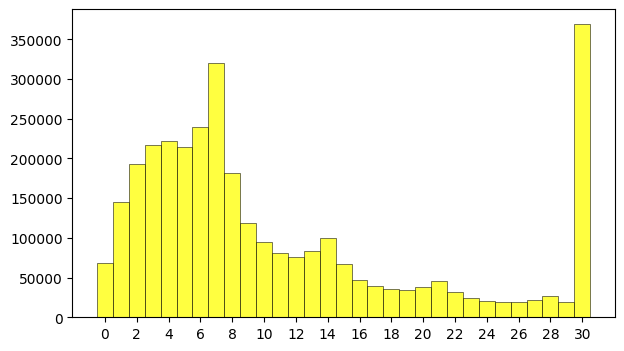

In [31]:
fig,ax = plt.subplots(figsize=(7,4), num=1)
n, bins, edges = ax.hist(reorder_days, bins=np.arange(N+1),
                         color='yellow', alpha=.75, edgecolor='black', linewidth=0.5)
ax.set_xticks(np.arange(0,N+1,2)+0.5)
ax.set_xticklabels(np.arange(0,N+1,2))
plt.show()

## 2.5. Sau 30 ngày, đa số khách hàng đã order bao nhiêu lần?

In [32]:
order_numbers = csv_data.T[2]
reorder_days = csv_data.T[-1]
reorder30 = order_numbers[reorder_days == 30]
print(reorder30.shape)

(369323,)


In [33]:
np.unique(reorder30, return_counts=True)

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
        67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79.,
        80., 81., 82., 83., 84., 85., 86., 87., 88., 90., 91., 92., 93.,
        95., 96., 98., 99.]),
 array([47839, 47130, 48887, 38780, 31212, 25290, 20575, 16926, 14155,
        11592,  9740,  8115,  6927,  5901,  4871,  4162,  3523,  3064,
         2623,  2217,  1942,  1702,  1392,  1298,  1119,   950,   877,
          735,   644,   551,   474,   460,   414,   340,   295,   282,
          249,   227,   162,   142,   145,   124,   129,   130,   122,
           90,    88,    70,    53,    52,    58,    42,    37,    29,
           26,    28,    30,    1

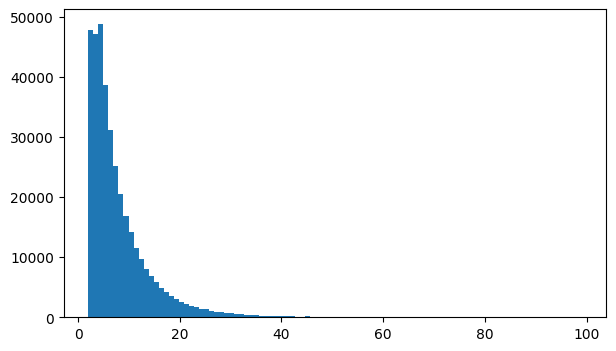

In [34]:
fig,ax = plt.subplots(figsize=(7,4), num=1)
ax.hist(reorder30, bins=98)
plt.show()